In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Datasets/Default.csv')

In [3]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [5]:
data.shape

(10000, 4)

## Finding Outliers

In [6]:
data['default'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
data['student'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x17b3e487250>,
 'caps': [<matplotlib.lines.Line2D at 0x17b3e4874d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b3e3a6fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x17b3e484a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b3e487750>],
 'means': []}

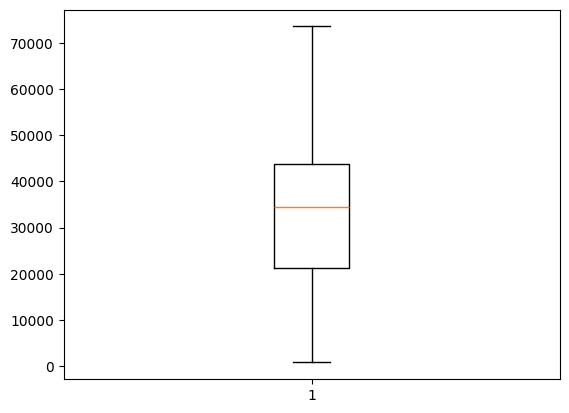

In [9]:
plt.boxplot(data['income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17b3e541310>,
 'caps': [<matplotlib.lines.Line2D at 0x17b3e541590>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b3e5411d0>],
 'medians': [<matplotlib.lines.Line2D at 0x17b3e541810>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b3e541950>],
 'means': []}

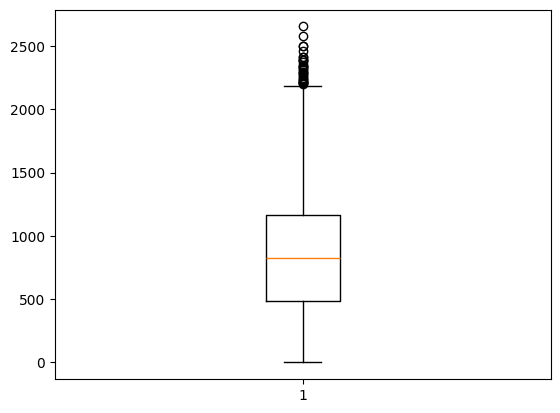

In [10]:
plt.boxplot(data['balance'])

In [11]:
q3 = data["balance"].quantile(0.75)
q1 = data["balance"].quantile(0.25)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
upper

np.float64(2193.1743093)

In [12]:
data[data["balance"] > upper].count()

default    31
student    31
balance    31
income     31
dtype: int64

In [13]:
data = data.drop(data[data["balance"] > upper].index)
data

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


## Convert Text to numbers

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
data["default"] = le.fit_transform(data["default"])
data["student"] = le.fit_transform(data["student"])

In [16]:
import seaborn as sns

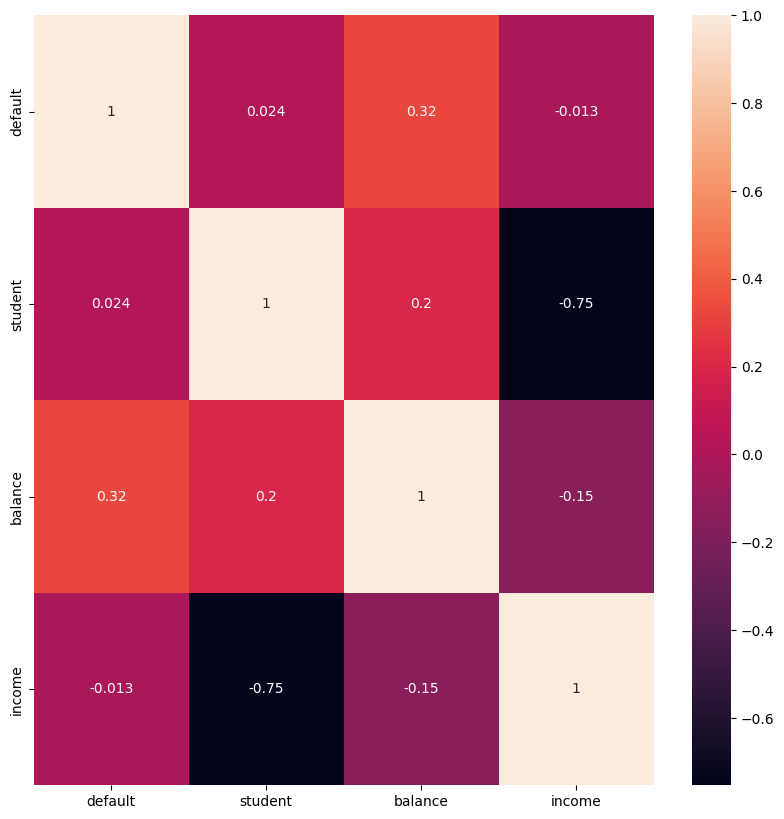

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Split the data

In [18]:
X = data.drop("default", axis = 1)
y = data["default"] 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train the model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [22]:
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [23]:
test_pred = knn.predict(X_test)

## Check Accuracy

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, test_pred)

0.9715814108993648

In [26]:
y_test.value_counts()

default
0    2913
1      78
Name: count, dtype: int64

## Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[2895,   18],
       [  67,   11]])

## Check K value to which accuracy is best

In [28]:
test_acc = []
train_acc = []
k = []

for i in range(3,20,2):
    k.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    test_acc.append(accuracy_score(y_test, test_pred))
    train_acc.append(accuracy_score(y_train, train_pred))

In [29]:
print(test_acc)

[0.9672350384486794, 0.9715814108993648, 0.9739217652958877, 0.9749247743229689, 0.974256101638248, 0.9735874289535272, 0.9735874289535272, 0.9739217652958877, 0.974256101638248]


In [30]:
print(train_acc)

[0.9770707939237604, 0.972341645170536, 0.970908569790771, 0.9697621094869591, 0.9693321868730295, 0.9683290341071941, 0.967755803955288, 0.9673258813413586, 0.9674691888793351]


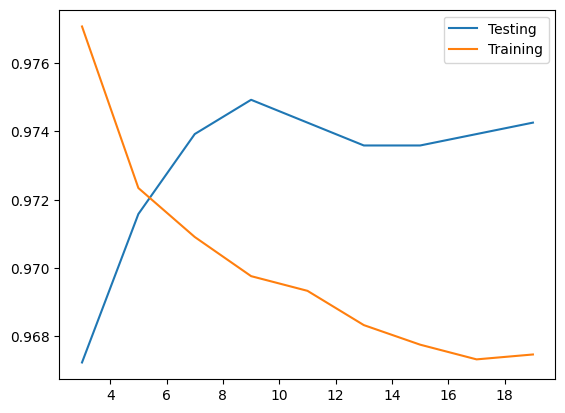

In [31]:
plt.plot(k,test_acc)
plt.plot(k,train_acc)
plt.legend(["Testing","Training"])

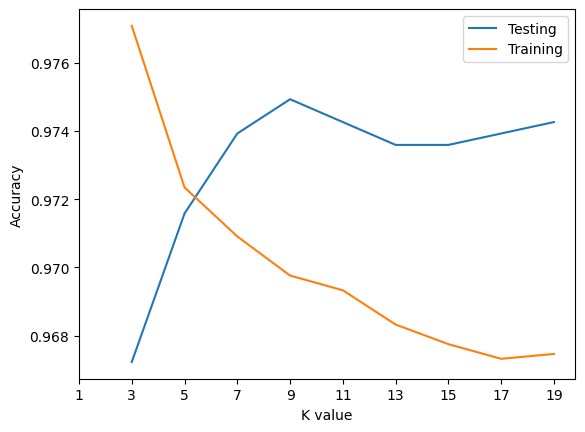

In [32]:
plt.plot(range(3, 21, 2), test_acc)
plt.plot(range(3, 21, 2), train_acc)

plt.xticks(range(1, 21, 2))   # show only odd numbers on diagram

plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend(["Testing", "Training"])
plt.show()

## Hyper parameter checking which is best(K value and distance formula)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
knn = KNeighborsClassifier()

In [35]:
parameter = {
    "n_neighbors": np.arange(3, 16, 2),
    "metric": ["euclidean", "manhattan", "cosine", "minkowski"]
}

In [36]:
gcv = GridSearchCV(estimator = knn, param_grid = parameter)

In [37]:
gcv.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': array([ 3, 5..., 11, 13, 15])}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the sc

In [38]:
gcv.best_params_

{'metric': 'euclidean', 'n_neighbors': np.int64(7)}

In [39]:
results = pd.DataFrame(gcv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009219,0.000679,0.011110,0.001652,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.966332,0.960602,0.964900,0.964875,0.965591,0.964460,0.002002,26
1,0.010326,0.001491,0.012096,0.001673,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.969198,0.963467,0.967765,0.965591,0.965591,0.966323,0.001978,20
2,0.008125,0.000274,0.010845,0.001034,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.970630,0.967765,0.967765,0.965591,0.966308,0.967612,0.001729,1
3,0.008208,0.000717,0.010819,0.000559,euclidean,9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.970630,0.967049,0.968481,0.966308,0.964875,0.967469,0.001963,3
4,0.007846,0.000274,0.011475,0.000761,euclidean,11,"{'metric': 'euclidean', 'n_neighbors': 11}",0.966332,0.966332,0.967765,0.967742,0.965591,0.966753,0.000861,15
5,0.007879,0.000276,0.012074,0.000459,euclidean,13,"{'metric': 'euclidean', 'n_neighbors': 13}",0.966332,0.967049,0.967049,0.967742,0.964875,0.966609,0.000975,18
6,0.007872,0.000401,0.012511,0.000305,euclidean,15,"{'metric': 'euclidean', 'n_neighbors': 15}",0.966332,0.967049,0.967765,0.967742,0.966308,0.967039,0.000641,10
7,0.008001,0.000235,0.010562,0.003289,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.967765,0.962034,0.965616,0.965591,0.965591,0.965320,0.001844,24
8,0.007635,0.000117,0.009690,0.000223,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.969914,0.965616,0.967765,0.963441,0.964875,0.966322,0.002275,22
9,0.008062,0.000284,0.010443,0.000334,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.971347,0.965616,0.968481,0.965591,0.965591,0.967325,0.002300,5


In [40]:
results = pd.DataFrame(gcv.cv_results_)
results[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'metric': 'euclidean', 'n_neighbors': 3}",0.964460,0.002002
1,"{'metric': 'euclidean', 'n_neighbors': 5}",0.966323,0.001978
2,"{'metric': 'euclidean', 'n_neighbors': 7}",0.967612,0.001729
3,"{'metric': 'euclidean', 'n_neighbors': 9}",0.967469,0.001963
4,"{'metric': 'euclidean', 'n_neighbors': 11}",0.966753,0.000861
5,"{'metric': 'euclidean', 'n_neighbors': 13}",0.966609,0.000975
6,"{'metric': 'euclidean', 'n_neighbors': 15}",0.967039,0.000641
7,"{'metric': 'manhattan', 'n_neighbors': 3}",0.965320,0.001844
8,"{'metric': 'manhattan', 'n_neighbors': 5}",0.966322,0.002275
9,"{'metric': 'manhattan', 'n_neighbors': 7}",0.967325,0.002300
